<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ai_Assignment6/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS203 Lab 6

### Team Number: 18
* Name: Paras Prashant Shirvale
* Roll No: 23110232
---
* Name: Akshat Shah
* Roll No: 23110293
---

In [2]:
!pip install tensorflow

In [3]:
!pip install seaborn

In [4]:
!pip install wandb

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [6]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

In [7]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [8]:
# Split the dataset into training, validation, and test sets (70%, 10%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=42)

In [9]:
# Normalize the feature values to the range [0,1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
# Step 4: Define MLP Model
model = models.Sequential([
    layers.InputLayer(input_shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.0454 - loss: 1.3844 - val_accuracy: 0.1333 - val_loss: 1.3190
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0382 - loss: 1.3419 - val_accuracy: 0.1333 - val_loss: 1.2832
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0746 - loss: 1.2973 - val_accuracy: 0.1333 - val_loss: 1.2491
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1190 - loss: 1.2480 - val_accuracy: 0.2000 - val_loss: 1.2171
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1412 - loss: 1.2040 - val_accuracy: 0.2667 - val_loss: 1.1868
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1814 - loss: 1.1613 - val_accuracy: 0.2667 - val_loss: 1.1577
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2137 - loss: 1.1203 - val_accuracy: 0.2667 - val_loss: 1.1304
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2608 - loss: 1.0871 - val_accuracy: 0.2667 - val_loss: 1.1044

In [14]:
# Step 8: Evaluate the model on the test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [15]:
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

In [16]:
import wandb

In [17]:
# Step 6: Set up W&B for experiment tracking
wandb.init(project="mlp-iris", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50
})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: akshat13 (akshat13-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [18]:
wandb.config.update({
    "Architechture": "MLP",
    "Neurons_hidden_layer": 16,
    "hidden_activation_function": "relu",
    "Neurons_input_layer": 4,
    "Neurons_output_layer": 3,
    "output_activation_function": "softmax",
    "loss_function": "categorical_crossentropy",
    "optimizer": "adam"
})

In [19]:
# Log the metrics to W&B
wandb.log({
    "test_accuracy": accuracy,
    "test_precision": precision,
    "test_recall": recall,
    "test_f1": f1
})

In [20]:
# Print metrics and confusion matrix
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

Test Accuracy: 0.8667
Test Precision: 0.9022
Test Recall: 0.8667
Test F1-Score: 0.8579


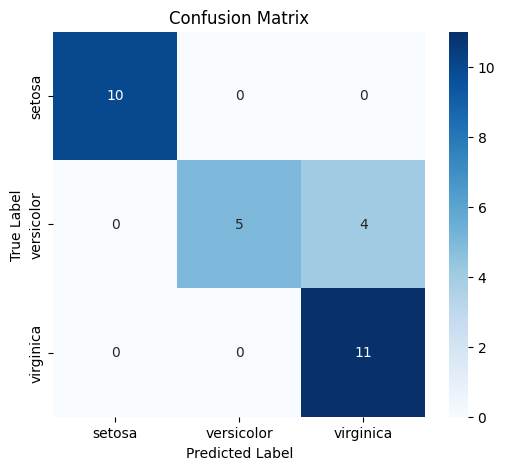

In [21]:
import seaborn as sns

# Step 1: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()
plt.close()

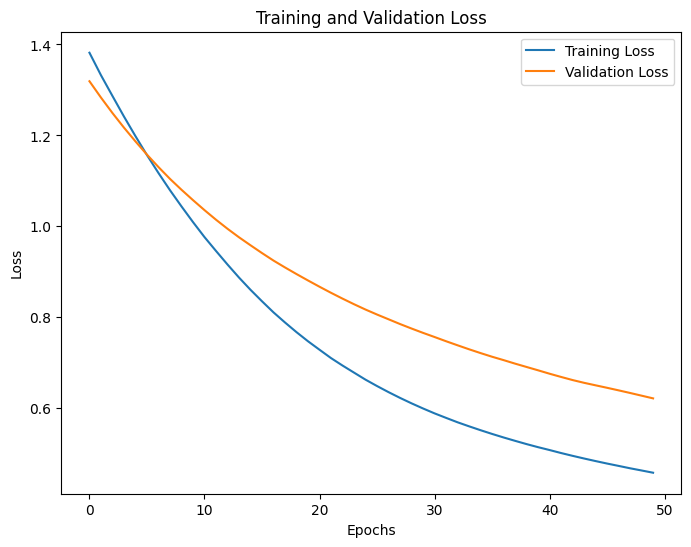

In [22]:
# Step 2: Loss Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
wandb.log({"loss_curve": wandb.Image(plt)})
plt.show()
plt.close()

In [23]:
for epoch, (train_loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": train_loss,
        "validation_loss": val_loss
    })

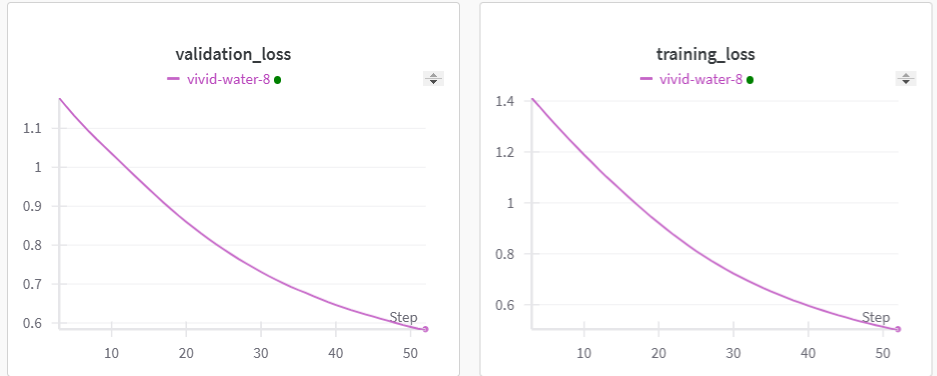

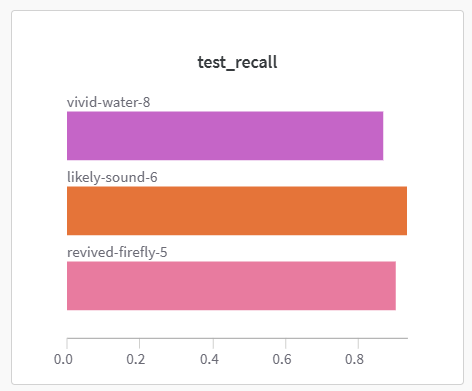

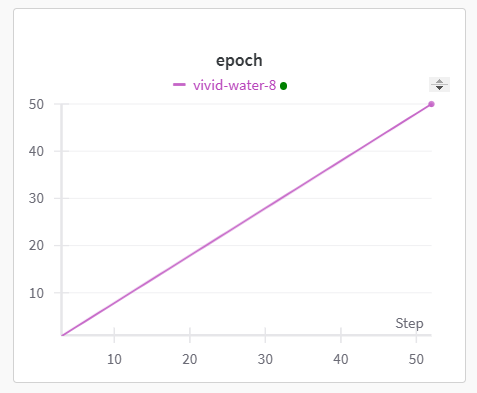

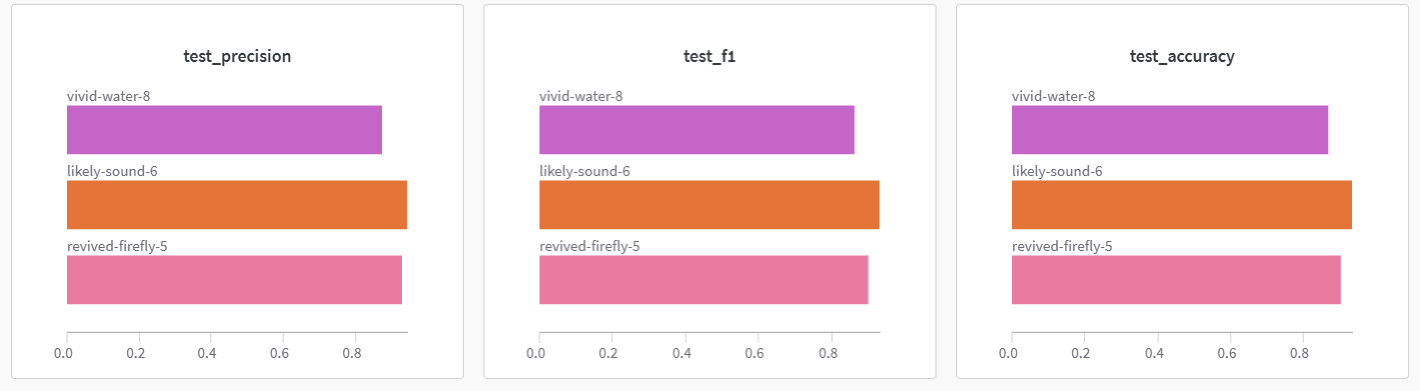

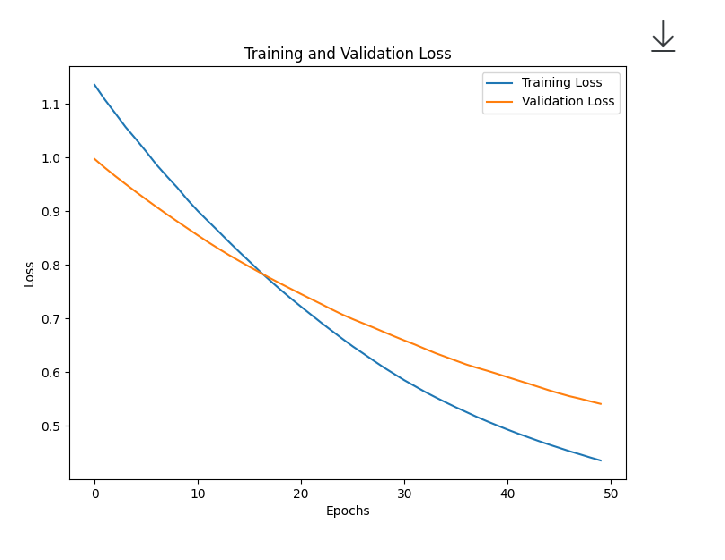

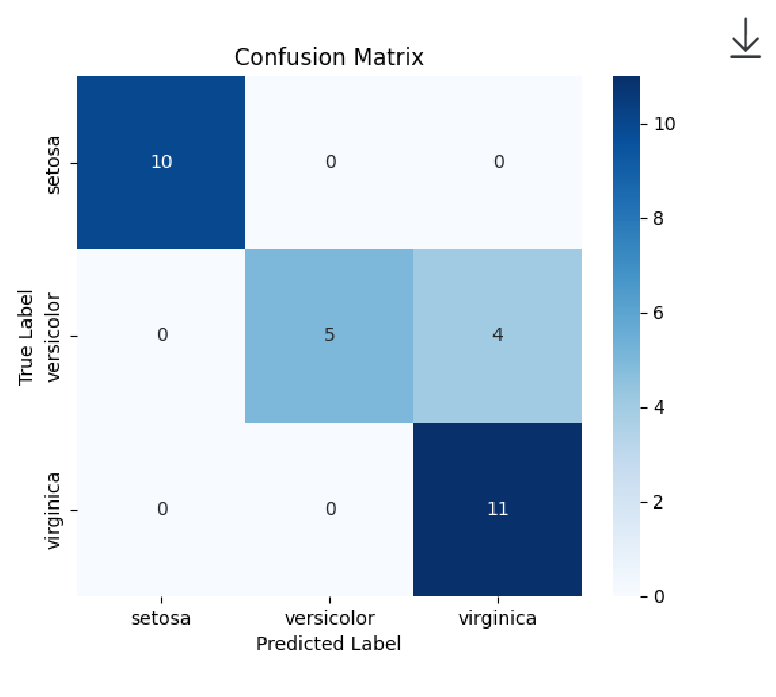

In [24]:
wandb.finish()

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_f1,▁
test_precision,▁
test_recall,▁
training_loss,██▇▇▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
validation_loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
epoch,50
test_accuracy,0.86667
test_f1,0.85788
test_precision,0.90222


## Section 2: Hyperparameters
This section aims to perform a hyperparameter search to improve the performance of a custom model that distinguishes between any two classes (positive/negative or anything).


In [25]:
!pip install --upgrade tensorflow


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score

# Define parameters for grid search
param_grid = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [3, 5]  # Removed epochs=1 cases from plotting
}

results = []

# Perform grid search
for batch_size in param_grid['batch_size']:
    for learning_rate in param_grid['learning_rate']:
        for epochs in param_grid['epochs']:
            print(f"\nTraining model with batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")
            keras.backend.clear_session()  # Reset model state

            # Initialize the MLP model
            model = Sequential([
                Dense(16, input_dim=4, activation='relu'),
                Dense(3, activation='softmax')
            ])

            # Compile the model with Adam optimizer
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                          loss=keras.losses.BinaryCrossentropy())

            # Train the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                verbose=1, validation_split=0.1)

            # Generate predictions
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Compute performance metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

            # Save results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1,
                'train_loss': history.history['loss'],
                'val_loss': history.history['val_loss'],
                'y_pred_classes': y_pred_classes,
                'y_test_classes': y_test_classes
            })

            # Display sample predictions
            print("\nSample Predictions:")
            print("Features | True Label | Predicted Label")
            print("-" * 30)
            for i in range(min(5, len(X_test))):
                print(f"{X_test[i]} | {y_test_classes[i]} | {y_pred_classes[i]}")

            # Output evaluation metrics
            print(f"\nResults for batch_size={batch_size}, learning_rate={learning_rate}, epochs={epochs}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")



Training model with batch_size=2, learning_rate=0.001, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6266 - val_loss: 0.5732
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5308 - val_loss: 0.5237
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4991 - val_loss: 0.4800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 2
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 0
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 2

Results for batch_size=2, learning_rate=0.001, epochs=3
Accuracy: 0.8000
F1 Score: 0.7714

Training model with batch_size=2, learning_rate=0.001, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7184 - val_loss: 0.6453
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6233 - val_loss: 0.5749
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5625 - val_loss: 0.5132
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4764 - val_loss: 0.4596
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4297 - val_loss: 0.4206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 2
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 0
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 2

Results for batch_size=2, learning_rate=0.001, epochs=5
Accuracy: 0.7667
F1 Score: 0.7206

Training model with batch_size=2, learning_rate=1e-05, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7368 - val_loss: 0.7262
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7383 - val_loss: 0.7252
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7471 - val_loss: 0.7241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 1
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 2
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 1
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 2

Results for batch_size=2, learning_rate=1e-05, epochs=3
Accuracy: 0.3333
F1 Score: 0.2764

Training model with batch_size=2, learning_rate=1e-05, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6983 - val_loss: 0.7149
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7288 - val_loss: 0.7140
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7059 - val_loss: 0.7131
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7151 - val_loss: 0.7123
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7041 - val_loss: 0.7114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 2
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 1
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 2

Results for batch_size=2, learning_rate=1e-05, epochs=5
Accuracy: 0.2667
F1 Score: 0.2564

Training model with batch_size=4, learning_rate=0.001, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6278 - val_loss: 0.6243
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5775 - val_loss: 0.5939
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5404 - val_loss: 0.5700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 2
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 0
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 2

Results for batch_size=4, learning_rate=0.001, epochs=3
Accuracy: 0.7000
F1 Score: 0.5935

Training model with batch_size=4, learning_rate=0.001, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6587 - val_loss: 0.6239
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6158 - val_loss: 0.5846
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5643 - val_loss: 0.5500
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5266 - val_loss: 0.5152
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4930 - val_loss: 0.4849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 1
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 0
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 1

Results for batch_size=4, learning_rate=0.001, epochs=5
Accuracy: 0.8333
F1 Score: 0.8267

Training model with batch_size=4, learning_rate=1e-05, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6515 - val_loss: 0.6601
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6458 - val_loss: 0.6595
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6416 - val_loss: 0.6589
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 2
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 1
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 2
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 2

Results for batch_size=4, learning_rate=1e-05, epochs=3
Accuracy: 0.5667
F1 Score: 0.5708

Training model with batch_size=4, learning_rate=1e-05, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6863 - val_loss: 0.6976
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6999 - val_loss: 0.6970
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6951 - val_loss: 0.6965
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6990 - val_loss: 0.6960
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7007 - val_loss: 0.6955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Sample Predictions:
Features | True Label | Predicted Label
------------------------------
[ 0.3523651  -0.65180842  0.57509204  0.04497632] | 1 | 1
[-0.1296979   1.57026575 -1.11320239 -1.13565217] | 0 | 0
[ 2.2806171  -1.09622326  1.81317462  1.4879667 ] | 2 | 0
[ 0.23184935 -0.42960101  0.46253908  0.43851915] | 1 | 2
[ 1.19597535 -0.65180842  0.63136852  0.30733821] | 1 | 1

Results for batch_size=4, learning_rate=1e-05, epochs=5
Accuracy: 0.4000
F1 Score: 0.3540


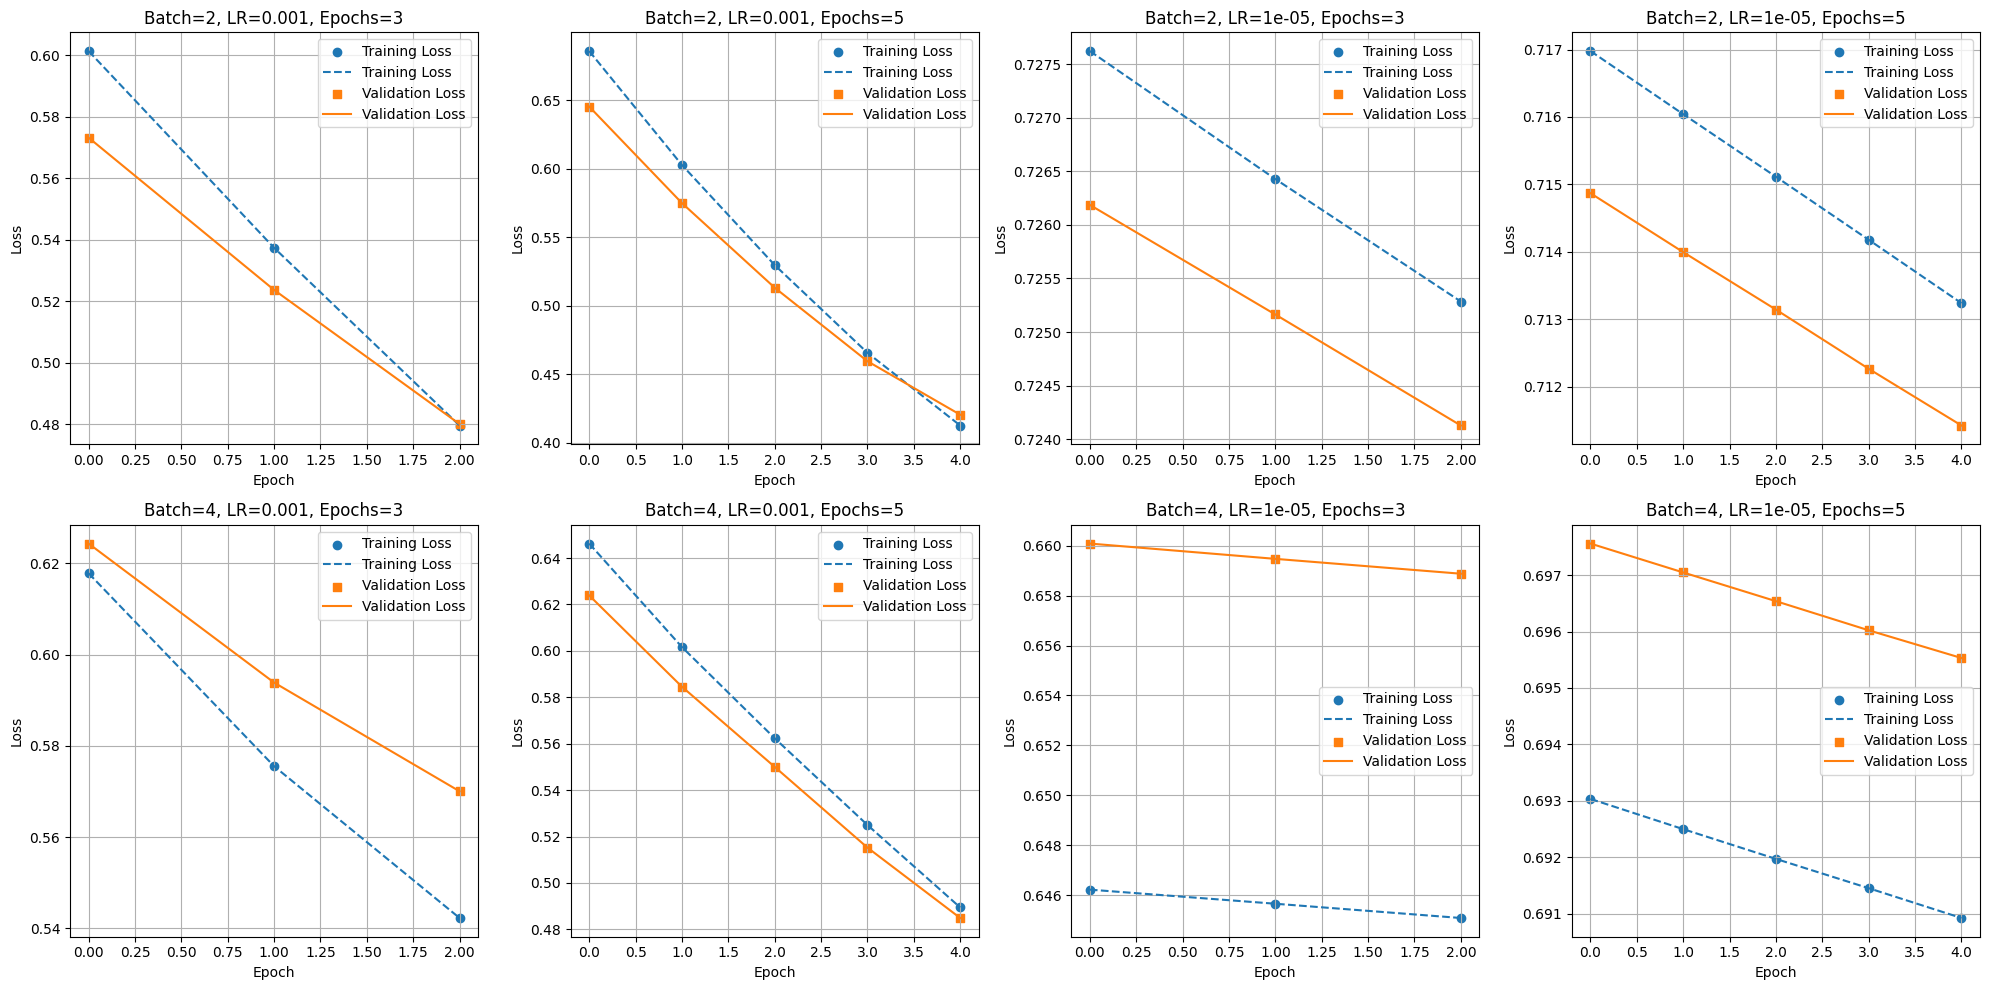

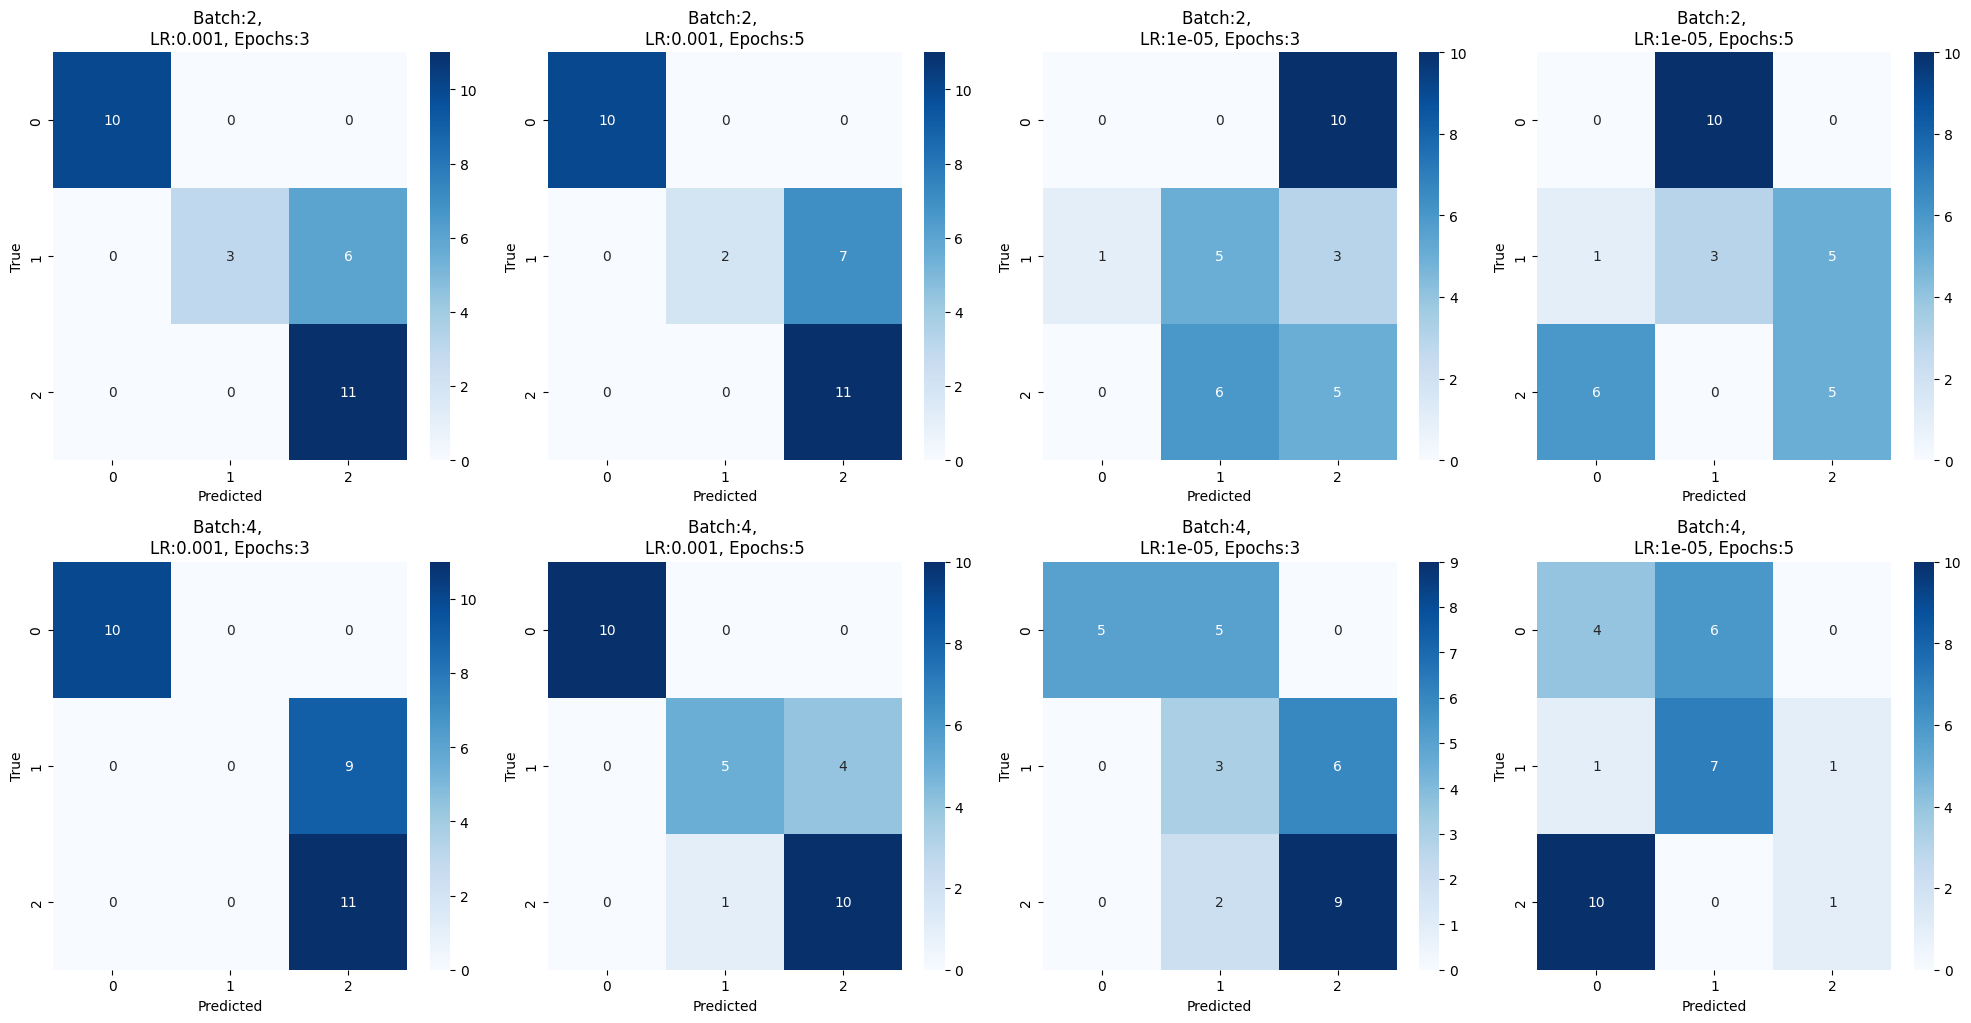

In [43]:
# Plot training and validation losses in a 2-row, 4-column grid
num_plots = min(len(results), 8)  # Ensure we don't exceed subplot limit
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_plots):
    result = results[i]
    ax = axes[i]
    ax.scatter(range(len(result['train_loss'])), result['train_loss'], label='Training Loss', marker='o')
    ax.plot(result['train_loss'], label='Training Loss', linestyle='dashed')
    ax.scatter(range(len(result['val_loss'])), result['val_loss'], label='Validation Loss', marker='s')
    ax.plot(result['val_loss'], label='Validation Loss', linestyle='solid')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Batch={result["batch_size"]}, LR={result["learning_rate"]}, Epochs={result["epochs"]}')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot Confusion Matrices for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

In [1]:
pip install autogluon